So today what we are trying to do is to make an MCMC sampler that work for a generic prior distribution for a generic proposal distribution in a non define number of dimensions!
Should be difficult in some way, let's see what are we able to do.

Let's start by encoding the distribution that we want to analize:

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
sig=np.array([3, 1])
mu=np.array([4, 5])
likelihood = (lambda x: np.exp(-(((x-mu)/sig)**2)/2.)/np.sqrt(2.*np.pi*(sig**2)))

We can write now the sampler, as a proposal distribution we will use `random.normal`

In [21]:
sigP = np.array([3, 3])
muP = np.array([4, 4])
Dim = len(muP)
Nsteps = 10000
sample =[]

for i in range(Nsteps):
    x = np.random.normal(muP, sigP, Dim)
    a = likelihood(x)/likelihood(muP)
    trial = np.random.uniform(0,1,1)
    if np.all(np.greater_equal(a, trial)):
        muP = x
    sample.append(muP)
sample

df = pd.DataFrame(sample)
df

,0,1
0,4.000000,4.000000
1,4.000000,4.000000
2,4.000000,4.000000
3,4.000000,4.000000
4,4.000000,4.000000
...,...,...
9995,2.276190,4.230331
9996,2.276190,4.230331
9997,3.797948,5.343338
9998,3.309655,5.542114


Let's plot the sample obtained

In [22]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

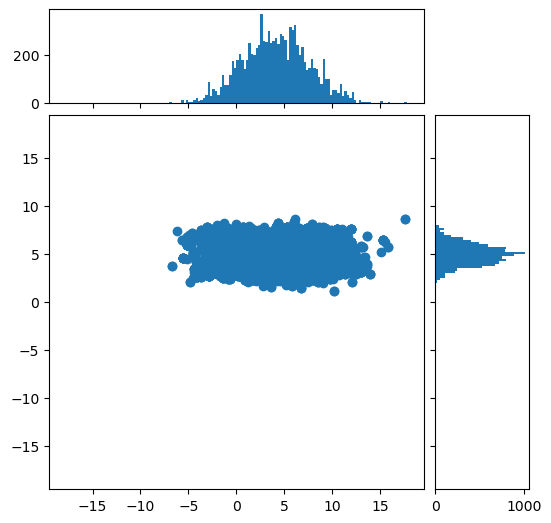

In [23]:
# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(df[0], df[1], ax, ax_histx, ax_histy)

plt.show()